# AHC029 統計的に考察

In [64]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [65]:
def clamp(x, a, b):
    return np.maximum(np.minimum(x, b), a)

In [102]:
def plot_accum(data, **kwargs):
    sx = np.sort(data)
    sy = np.arange(len(sx)) / len(sx)
    plt.plot(sx, sy, **kwargs)

## $b$について

定義通り一様分布に従っている

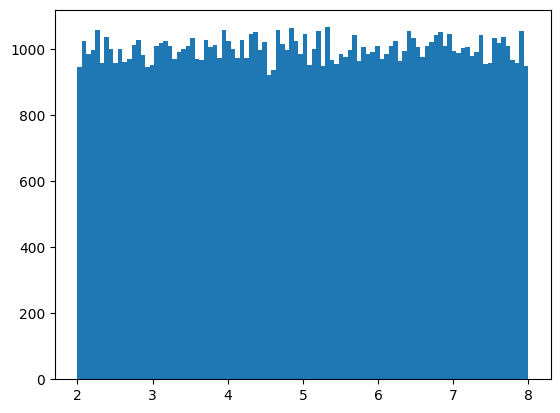

In [66]:
n = 100000
b = np.random.uniform(2.0, 8.0, n)
plt.hist(b, bins=100)
plt.show()

## $h$について

当然、指数関数の形で分布している

`round`した関係でギザギザの形になっている

期待値:  60.64442


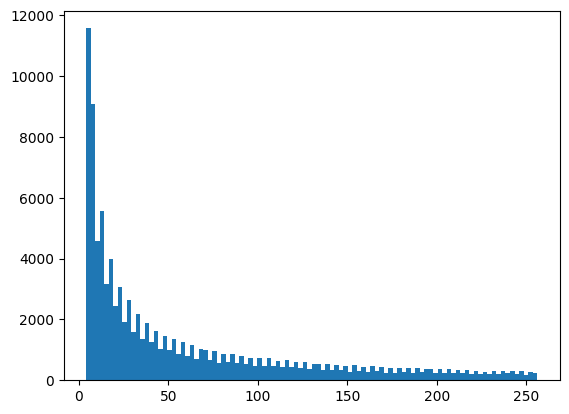

In [67]:
h = np.round(np.power(2, b))
print("期待値: ", np.mean(h))
plt.hist(h, bins=100)
plt.show()

$h$の累積分布関数も作ってみた

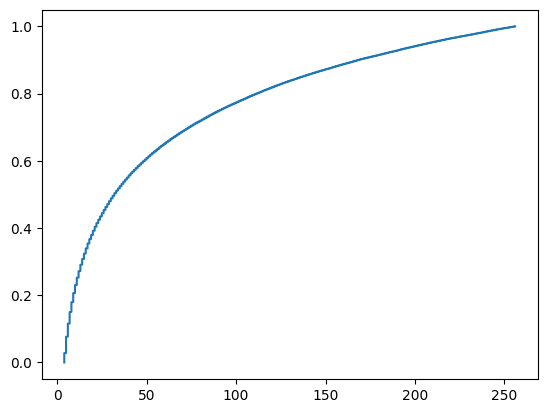

In [96]:
plot_accum(h)
plt.show()

## $v$について

指数関数っぽいが、$h$より急な形をしている

期待値:  64.43184


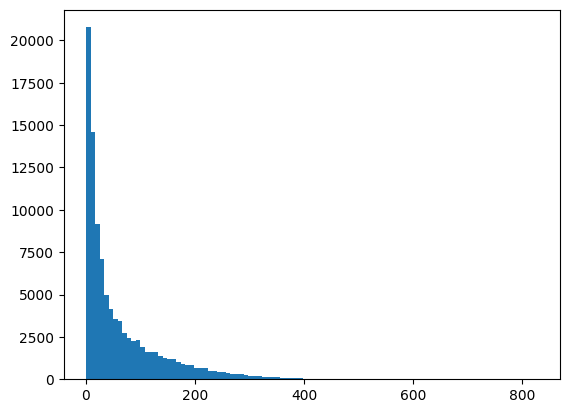

In [68]:
v = np.round(np.power(2, clamp(np.random.normal(b, 0.5), 0.0, 10.0)))
print("期待値: ", np.mean(v))
plt.hist(v, bins=100)
plt.show()

## $h$と$v$でコスパ計算

形状が正規分布に似ていたので、近似できるか試したが、少し違った
- 左側が中央に集まっている
- 右側が外に広がっている

期待値:  1.0626168782431342
分散:  0.1448266049433702


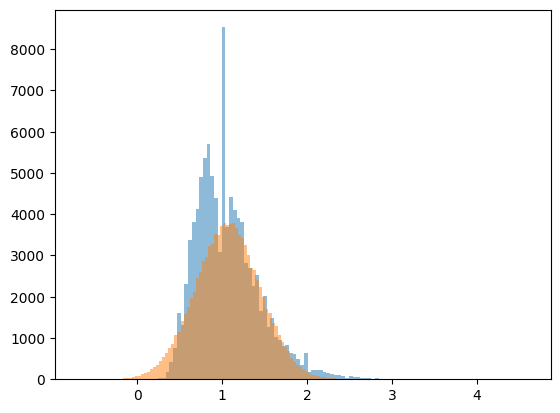

In [100]:
cp = v/h
mu = np.mean(cp)
sigma = np.std(cp)
print("期待値: ", mu)
print("分散: ", sigma**2)
norm = np.random.normal(mu, sigma, n)
plt.hist(cp, bins=100, alpha=0.5)
plt.hist(norm, bins=100, alpha=0.5)
plt.show()

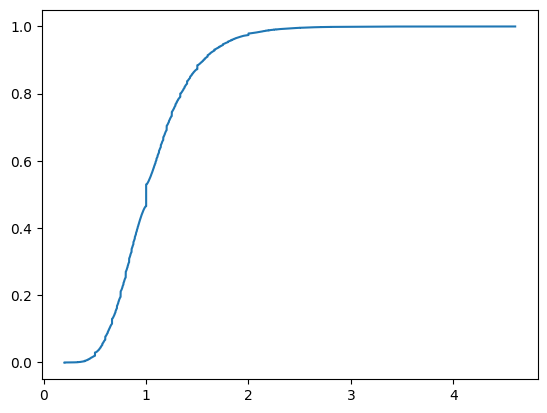

In [99]:
plot_accum(cp)
plt.show()

## カード生成について

### 生成されるカードの種類について

下のセルは単一のテストケースについて、カードの種類を数えている

何度も実行するうちにかなりヒストグラムの形が変わるので、C++を実行している途中に隠しパラメーター$x_i$を推測しに行く必要がありそう

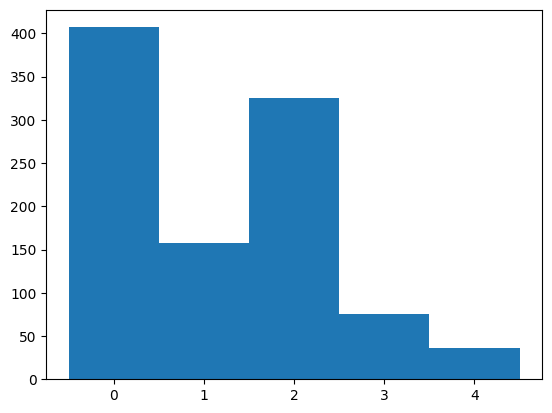

In [69]:
x0 = np.random.randint(1, 20)
x1 = np.random.randint(1, 10)
x2 = np.random.randint(1, 10)
x3 = np.random.randint(1, 5)
x4 = np.random.randint(1, 3)

x = np.array([x0, x1, x2, x3, x4]).T
t = np.random.choice(np.arange(5), 1000, p=x / np.sum(x))

plt.hist(t, bins=5, range=(0, 5), align="left")
plt.show()

$t = 0,1,2,3,4$が出る確率をそれぞれプロットしてみる

平均と分散を考えて現在の確率を考えるとかできそう

In [70]:
df = pd.DataFrame(columns=[*range(5)])

for i in range(10000):
    x0 = np.random.randint(1, 20)
    x1 = np.random.randint(1, 10)
    x2 = np.random.randint(1, 10)
    x3 = np.random.randint(1, 5)
    x4 = np.random.randint(1, 3)

    x = np.array([x0, x1, x2, x3, x4]).T
    t = np.random.choice(np.arange(5), 1000, p=x / np.sum(x))
    [np.sum(t == i) for i in range(5)]
    df.loc[i] = [np.sum(t == i)/1000 for i in range(5)]

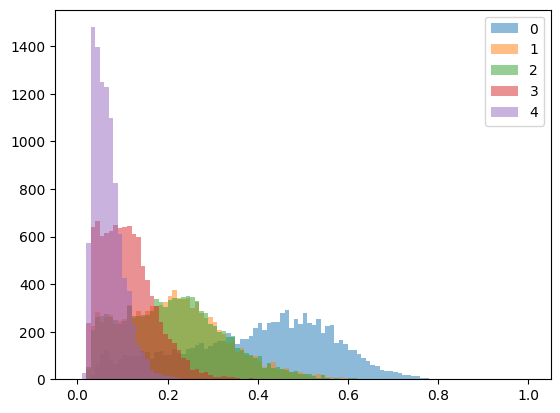

In [71]:
for i in range(5):
    plt.hist(df[i], bins=100, range=(0, 1), alpha=0.5)
plt.legend([*range(5)])
plt.show()

### カードのコストについて

仮に$M=5$として計算する

生成方法が同じなので、$t=0,1$で分布の形は同じ

p0の期待値:  24.99285
p1の期待値:  124.76058


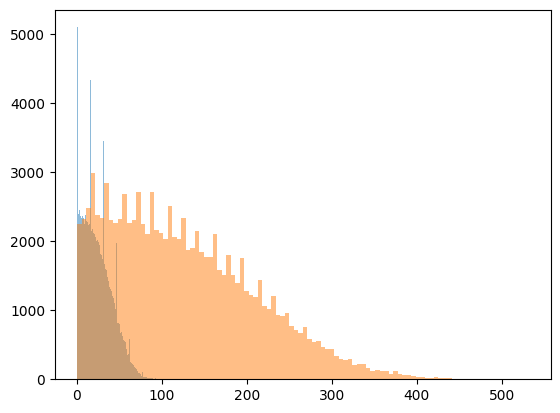

In [72]:
M=5

w = np.random.randint(1, 50, n)
p0 = clamp(np.round(np.random.normal(w, w/3, n)), 1, 10000)
p1 = clamp(np.round(np.random.normal(w*M, w*M/3, n)), 1, 10000)
p2 = np.random.randint(0, 10)
p3 = np.random.randint(0, 10)
p4 = np.random.randint(200, 1000)

print("p0の期待値: ", np.mean(p0))
print("p1の期待値: ", np.mean(p1))

plt.hist(p0, bins=100, alpha=0.5)
plt.hist(p1, bins=100, alpha=0.5)
plt.show()

### コスパについて

コスパの分布もほぼ変わらないが、$t=1$のほうが分散が大きく、高い方向の外れ値が多い

cp0の期待値:  1.220182594446923
cp1の期待値:  1.3875683287985745
cp0の分散:  2.089768046723763
cp1の分散:  30.75766765678328


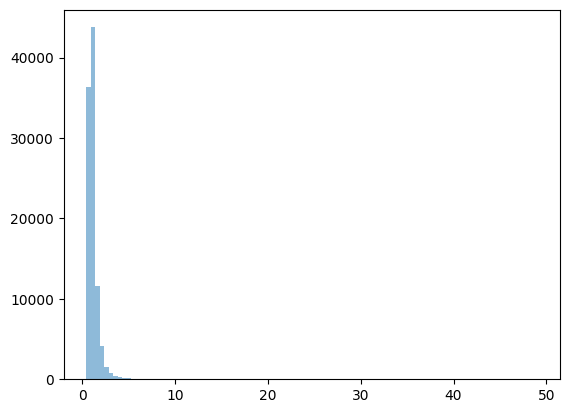

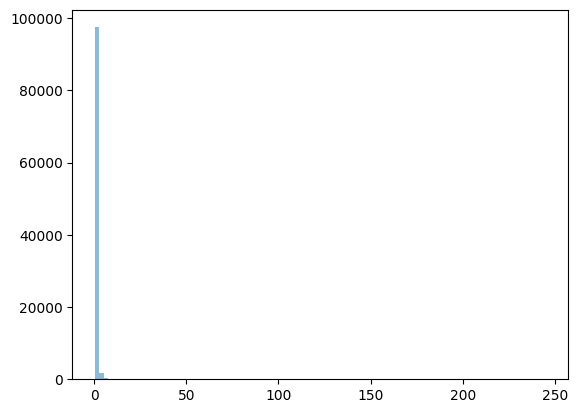

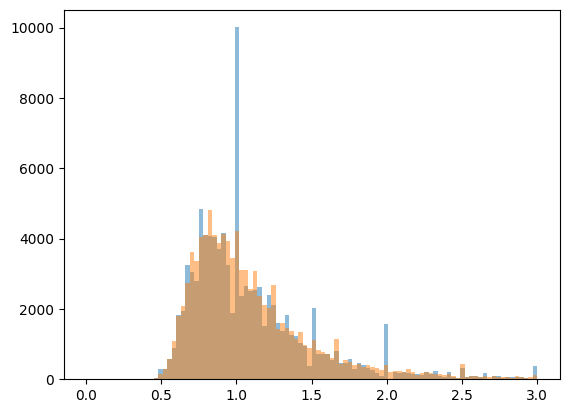

In [109]:
cp0 = w/p0
cp1 = w*M/p1

print("cp0の期待値: ", np.mean(cp0))
print("cp1の期待値: ", np.mean(cp1))
print("cp0の分散: ", np.var(cp0))
print("cp1の分散: ", np.var(cp1))

plt.hist(cp0, bins=100, alpha=0.5)
plt.show()
plt.hist(cp1, bins=100, alpha=0.5)
plt.show()

plt.hist(cp0, bins=100, range=(0,3), alpha=0.5)
plt.hist(cp1, bins=100, range=(0,3), alpha=0.5)
plt.show()

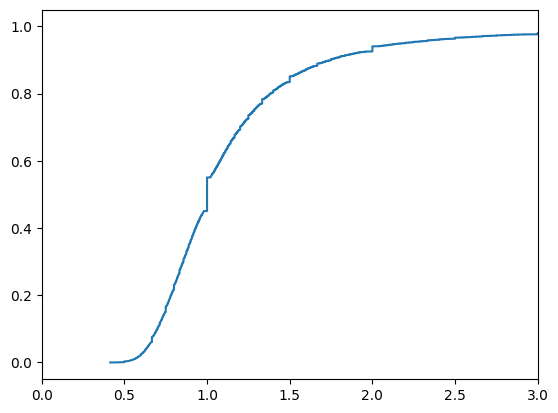

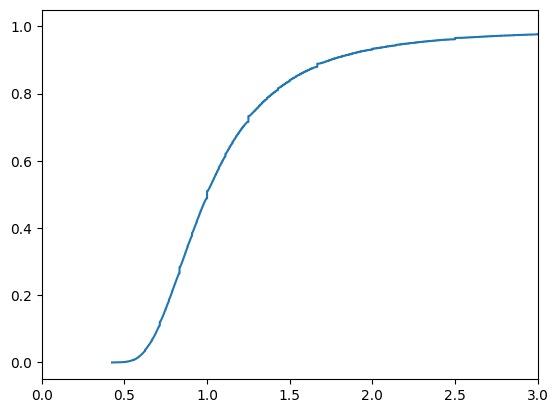

In [108]:
plot_accum(cp0)
plt.xlim(0, 3)
plt.show()
plot_accum(cp1)
plt.xlim(0, 3)
plt.show()